<a href="https://colab.research.google.com/github/AggelosRDio/MscMachineLearning/blob/master/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4

## Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error

## Question 1.1

In [2]:
df_missing = pd.read_csv('wine-missing.csv')
df_missing.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


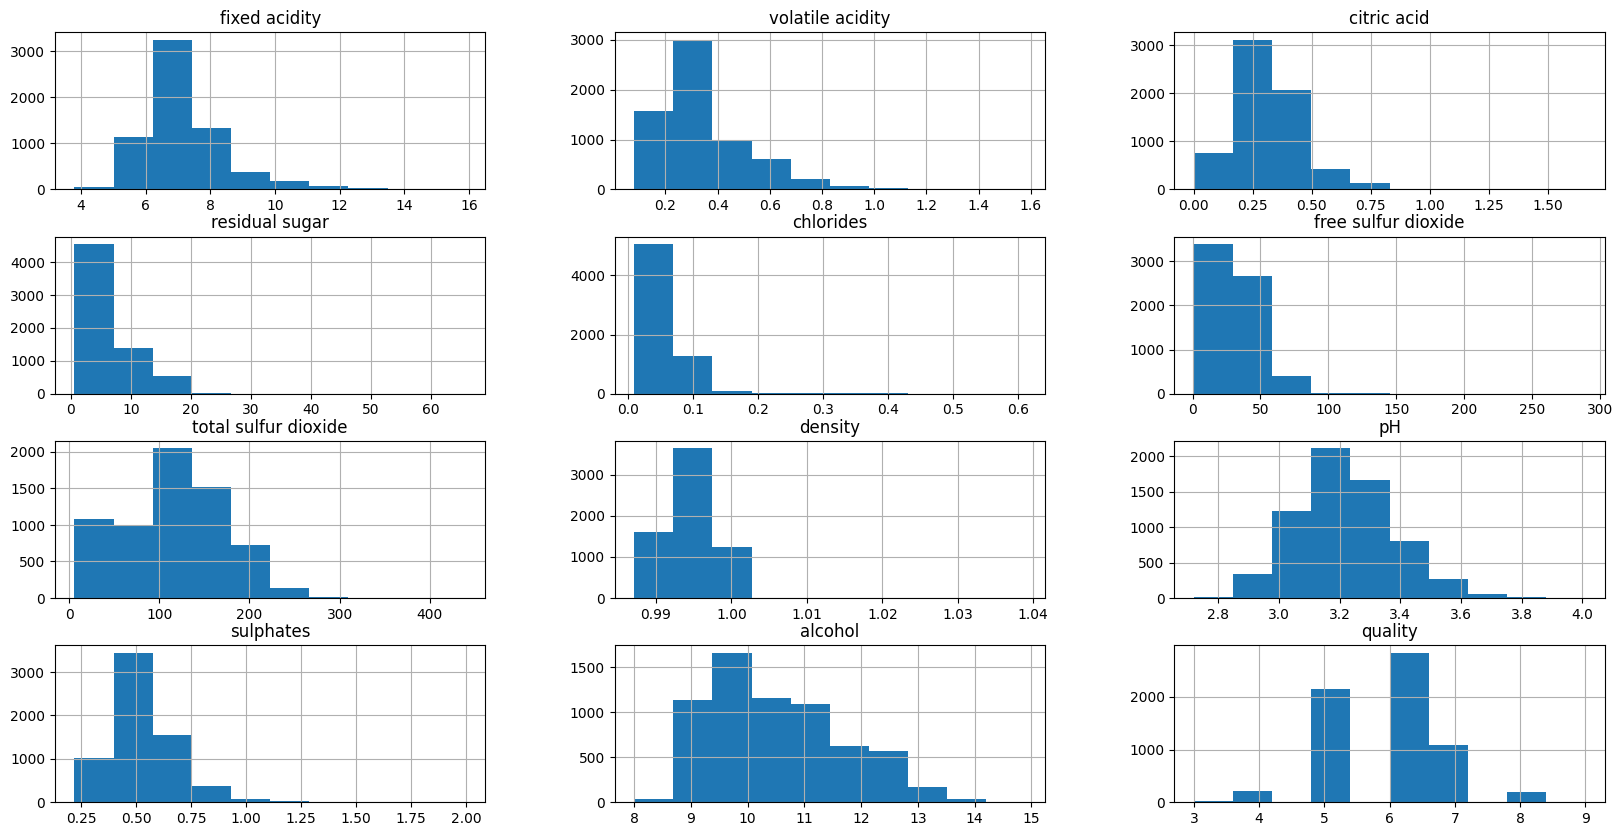

In [3]:
df_missing.hist(figsize=(20, 10))
plt.show()

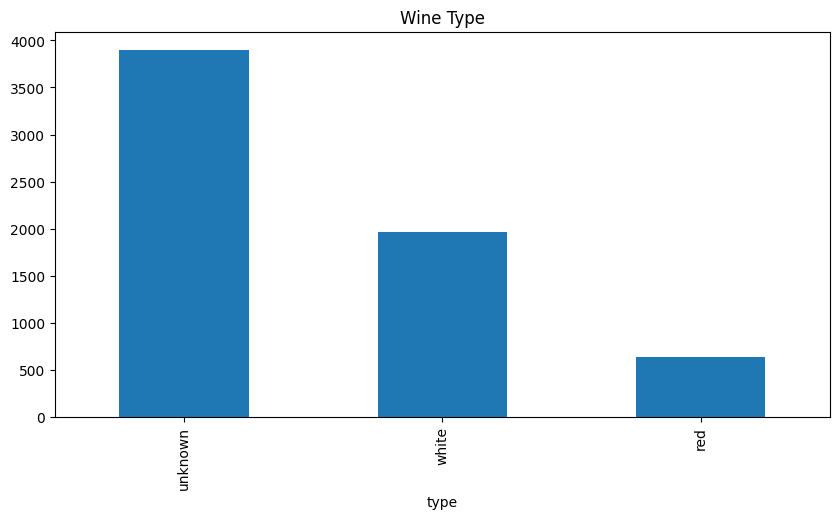

In [4]:
df_missing['type'].value_counts().plot(kind = 'bar', figsize = (10, 5), title = 'Wine Type')
plt.show()

## Question 1.2

In [5]:
df_working = df_missing.copy()
type_mappings = {'white' : 0, 'red': 1, 'unknown': 2}
df_working['type'] = df_working['type'].map(type_mappings)
x = df_working.drop(['type'], axis=1).values
x

array([[ 7.   ,  0.27 ,  0.36 , ...,  0.45 ,  8.8  ,  6.   ],
       [ 6.3  ,  0.3  ,  0.34 , ...,  0.49 ,  9.5  ,  6.   ],
       [ 8.1  ,  0.28 ,  0.4  , ...,  0.44 , 10.1  ,  6.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

In [6]:
y = df_working['type'].values
y

array([0, 2, 0, ..., 2, 1, 1])

## Question 1.3

In [7]:
x_known = x[y != 2]
y_known = y[y != 2]
x_unknown = x[y == 2]

## Question 1.4

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_known, y_known, test_size = 0.3, random_state = 42, stratify = y_known)

## Question 1.5

In [9]:
print("\n")

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

train_metrics = {
    'accuracy': accuracy_score(y_train, y_train_pred),
    'f1': f1_score(y_train, y_train_pred, average='weighted'),
    'precision': precision_score(y_train, y_train_pred, average='weighted'),
    'recall': recall_score(y_train, y_train_pred, average='weighted')
}

test_metrics = {
    'accuracy': accuracy_score(y_test, y_test),
    'f1': f1_score(y_test, y_test_pred, average='weighted'),
    'precision': precision_score(y_test, y_test_pred, average='weighted'),
    'recall': recall_score(y_test, y_test_pred, average='weighted')
}

for metric, value in train_metrics.items():
    print(f'Train {metric}: {value:.4f}')

print("\n" + "="*40 + "\n")

for metric, value in test_metrics.items():
    print(f'Test {metric}: {value:.4f}')

print("\n" + "="*40 + "\n")

pct = abs(np.sum(y_known == 0) - np.sum(y_known == 1)) / len(y_known)
print(f'{pct:.4f}')

print("\n")



Train accuracy: 0.9995
Train f1: 0.9995
Train precision: 0.9995
Train recall: 0.9995


Test accuracy: 1.0000
Test f1: 0.9987
Test precision: 0.9987
Test recall: 0.9987


0.5075




The dataset is <u>imbalanced</u>. As such F1 score is a more representative metric as it balances recall and precision. Accuracy can be misleading in imbalanced datasets.

## Question 1.6

In [10]:
print("\n")

rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(x_train, y_train)

y_train_pred_balanced = rf_balanced.predict(x_train)
y_test_pred_balanced = rf_balanced.predict(x_test)

train_metrics_balanced = {
    'accuracy': accuracy_score(y_train, y_train_pred_balanced),
    'f1': f1_score(y_train, y_train_pred_balanced, average='weighted'),
    'precision': precision_score(y_train, y_train_pred_balanced, average='weighted'),
    'recall': recall_score(y_train, y_train_pred_balanced, average='weighted')
}

test_metrics_balanced = {
    'accuracy': accuracy_score(y_test, y_test_pred_balanced),
    'f1': f1_score(y_test, y_test_pred_balanced, average='weighted'),
    'precision': precision_score(y_test, y_test_pred_balanced, average='weighted'),
    'recall': recall_score(y_test, y_test_pred_balanced, average='weighted')
}

for metric, value in train_metrics.items():
    print(f'Train {metric}: {value:.4f}')

print("\n" + "="*40 + "\n")

for metric, value in test_metrics.items():
    print(f'Test {metric}: {value:.4f}')

print("\n")



Train accuracy: 0.9995
Train f1: 0.9995
Train precision: 0.9995
Train recall: 0.9995


Test accuracy: 1.0000
Test f1: 0.9987
Test precision: 0.9987
Test recall: 0.9987




In [11]:
print("Model Comparison: ")
print("\n")
print("="*40)
print("\n")
print(f"Original Test Accuracy: {test_metrics['accuracy']:.4f}")
print(f"Balanced Test Accuracy: {test_metrics_balanced['accuracy']:.4f}")
print("\n")
print("="*40)
print("\n")

print(f"Original Test F1: {test_metrics['f1']:.4f}")
print(f"Balanced Test F1: {test_metrics_balanced['f1']:.4f}")
print("\n")

Model Comparison: 




Original Test Accuracy: 1.0000
Balanced Test Accuracy: 0.9949




Original Test F1: 0.9987
Balanced Test F1: 0.9949




## Question 1.7

In [12]:
y_unknown_proba = rf_balanced.predict_proba(x_unknown)

print(f"Probability array shape: {y_unknown_proba.shape}")
print(f"\nUknown samples: {len(x_unknown)}")
print(f"\nProbability predictions [P(white), P(red)]: \n")
y_unknown_proba

Probability array shape: (3898, 2)

Uknown samples: 3898

Probability predictions [P(white), P(red)]: 



array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99]])

## Question 1.8

In [13]:
red = y_unknown_proba[:, 1] > 0.65
white = y_unknown_proba[:, 1] < 0.35

y_unknown_pred = np.full(len(x_unknown), -1)
y_unknown_pred
y_unknown_pred[red] = 1
y_unknown_pred[white] = 0

print(f"Number of unknown samples: {len(x_unknown)}")
print(f"\nNumber of red wines: {np.sum(y_unknown_pred == 1)}")
print(f"\nNumber of white wines: {np.sum(y_unknown_pred == 0)}")
print(f"\nNumber of unlabeled wines: {np.sum(y_unknown_pred == -1)}")

Number of unknown samples: 3898

Number of red wines: 908

Number of white wines: 2939

Number of unlabeled wines: 51


## Question 1.9

In [14]:
x_unknown_labeled = x_unknown[y_unknown_pred != -1]
y_unknown_labeled = y_unknown_pred[y_unknown_pred != -1]

x_train_combined = np.vstack([x_train, x_unknown_labeled])
y_train_combined = np.hstack([y_train, y_unknown_labeled])

rf_combined = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_combined.fit(x_train_combined, y_train_combined)

y_train_combined_pred = rf_combined.predict(x_train_combined)
y_test_combined_pred = rf_combined.predict(x_test)

train_accuracy_combined = accuracy_score(y_train_combined, y_train_combined_pred)
test_accuracy_combined = accuracy_score(y_test, y_test_combined_pred)

print(f"Train Accuracy (combined): {train_accuracy_combined:.4f}")
print(f"\nTest Accuracy: {test_accuracy_combined:.4f}")
print(f"\nPrevious Test Accuracy: {test_metrics_balanced['accuracy']:.4f}")

Train Accuracy (combined): 0.9998

Test Accuracy: 0.9949

Previous Test Accuracy: 0.9949


## Question 1.10

In [15]:
x_train_iter = x_train.copy()
y_train_iter = y_train.copy()
x_unlabeled = x_unknown.copy()

test_acurracies = []
training_sizes = []

while True:

  if (len(x_unlabeled) == 0):
    break

  rf_iter = RandomForestClassifier(random_state=42, class_weight='balanced')
  rf_iter.fit(x_train_iter, y_train_iter)

  y_unlabeled_proba = rf_iter.predict_proba(x_unlabeled)

  red = y_unlabeled_proba[:, 1] > 0.65
  white = y_unlabeled_proba[:, 1] < 0.35

  if np.sum(red | white) == 0:
    break


  y_new_labeled = np.where(red[red | white] > 0.65, 1, 0)


  x_train_iter = np.vstack([x_train_iter, x_unlabeled[red | white]])
  y_train_iter = np.hstack([y_train_iter, y_new_labeled])

  x_unlabeled = x_unlabeled[~(red | white)]

  y_test_iter_pred = rf_iter.predict(x_test)
  test_acc = accuracy_score(y_test, y_test_iter_pred)
  test_acurracies.append(test_acc)
  training_sizes.append(len(x_train_iter))

  print(f"Test Accuracy: {test_acc}")
  print(f"Training Size: {len(x_train_iter)}")
  print(f"Remaining Unlabeled: {len(x_unlabeled)}")
  print("="*40)


Test Accuracy: 0.9948717948717949
Training Size: 5666
Remaining Unlabeled: 51
Test Accuracy: 0.9948717948717949
Training Size: 5689
Remaining Unlabeled: 28
Test Accuracy: 0.9961538461538462
Training Size: 5691
Remaining Unlabeled: 26
Test Accuracy: 0.9961538461538462
Training Size: 5696
Remaining Unlabeled: 21
Test Accuracy: 0.9974358974358974
Training Size: 5697
Remaining Unlabeled: 20


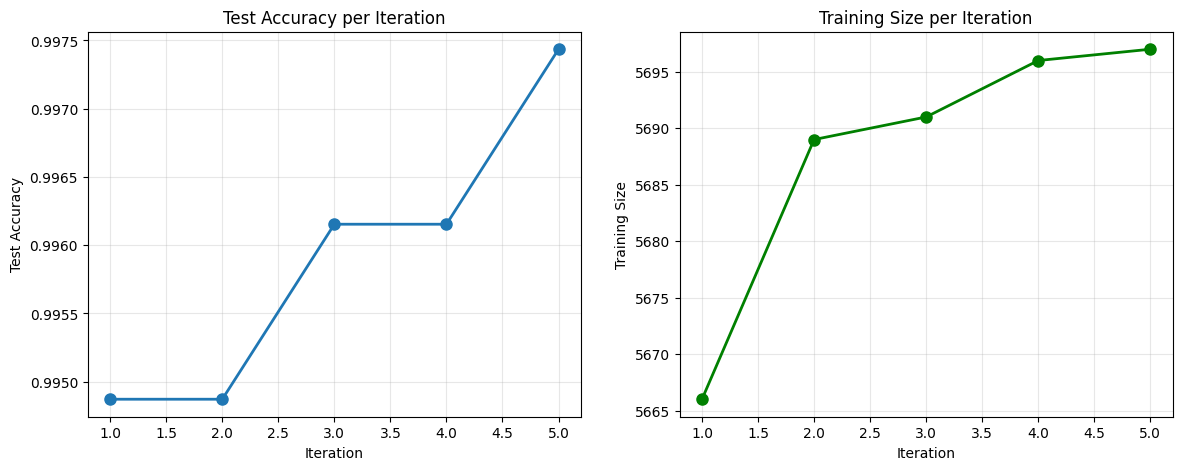

In [16]:
fig, axis = plt.subplots(1, 2, figsize=(14, 5))

axis[0].plot(range(1, len(test_acurracies) + 1), test_acurracies, marker='o', linewidth = 2, markersize = 8)
axis[0].set_xlabel('Iteration')
axis[0].set_ylabel('Test Accuracy')
axis[0].set_title('Test Accuracy per Iteration')
axis[0].grid(True, alpha=0.3)

axis[1].plot(range(1, len(training_sizes) + 1), training_sizes, marker='o', color='green', linewidth = 2, markersize = 8)
axis[1].set_xlabel('Iteration')
axis[1].set_ylabel('Training Size')
axis[1].set_title('Training Size per Iteration')
axis[1].grid(True, alpha=0.3)
plt.show()

## Question 2.1

In [17]:
df_full = pd.read_csv('wine-full.csv')
quality_counts = df_full['quality'].value_counts().sort_index()
quality_counts

,count
quality,
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


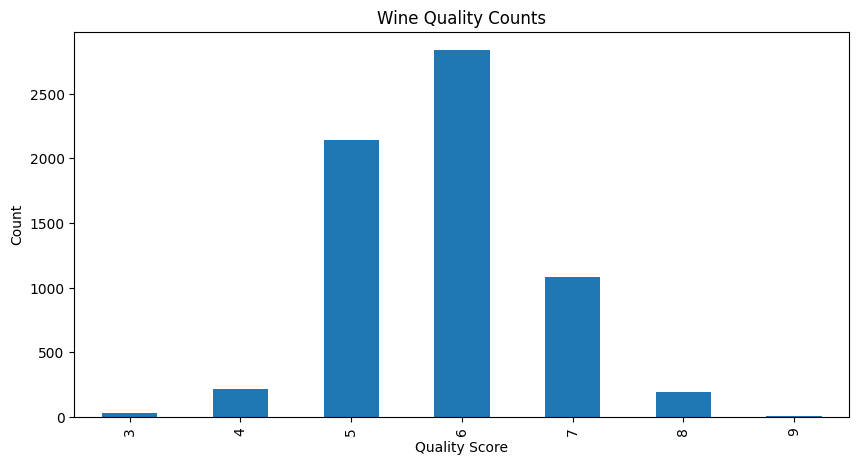

In [18]:
quality_counts.plot(kind='bar', figsize=(10, 5), title='Wine Quality Counts')
plt.xlabel('Quality Score')
plt.ylabel('Count')

plt.show()

In [19]:
coefficient_of_variation = quality_counts.std() / quality_counts.mean()
print(f"Coefficient of Variation: {coefficient_of_variation:.2f}")

Coefficient of Variation: 1.23


The quality scored are <u>imbalanced</u>. The distribution is skewed with most wines having scores 5 or 6. Extreme scores, like 3 or 9 have very few samples, which can affect model training.

## Question 2.2

In [20]:
red_quality = df_full[df_full['type'] == 'red']['quality']
white_quality = df_full[df_full['type'] == 'white']['quality']

print(f"Red Wine Quality Mean: {red_quality.mean():.4f}")
print(f"Red Wine Quality Median: {red_quality.median():.4f}")
print(f"Red Wine Std Deviation: {red_quality.std():.4f}")

print("\n" + "="*40 + "\n")

print(f"White Wine Quality Mean: {white_quality.mean():.4f}")
print(f"White Wine Quality Median: {white_quality.median():.4f}")
print(f"White Wine Std Deviation: {white_quality.std():.4f}")
print("\n")

Red Wine Quality Mean: 5.6360
Red Wine Quality Median: 6.0000
Red Wine Std Deviation: 0.8076


White Wine Quality Mean: 5.8779
White Wine Quality Median: 6.0000
White Wine Std Deviation: 0.8856




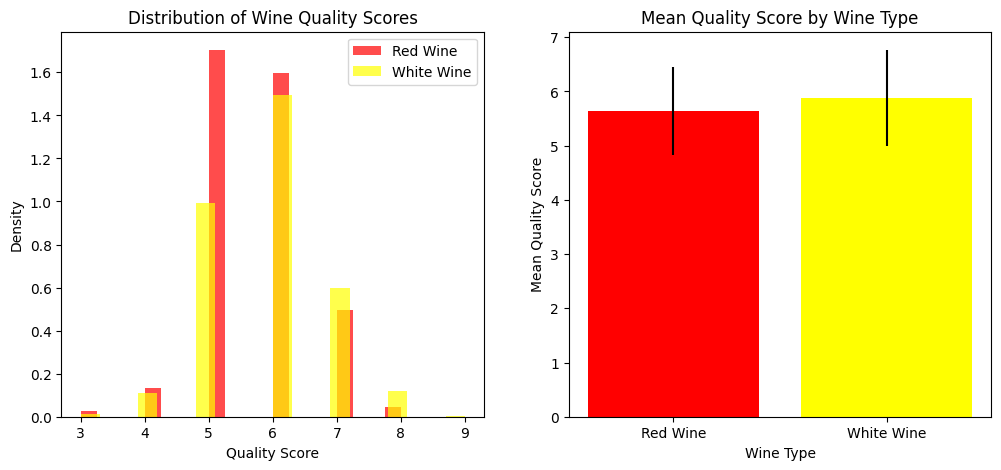

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(red_quality, bins=20, color='red', alpha=0.7, label='Red Wine', density=True)
axes[0].hist(white_quality, bins=20, color='yellow', alpha=0.7, label='White Wine', density=True)
axes[0].set_xlabel('Quality Score')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Wine Quality Scores')
axes[0].legend()

means = [red_quality.mean(), white_quality.mean()]
std = [red_quality.std(), white_quality.std()]
axes[1].bar(['Red Wine', 'White Wine'], means, yerr=std, color=['red', 'yellow'])
axes[1].set_xlabel('Wine Type')
axes[1].set_ylabel('Mean Quality Score')
axes[1].set_title('Mean Quality Score by Wine Type')
plt.show()

Based on the data on the above charts and the statistical metrics <u>white</u> wine has slightly higher average quality.

## Question 2.3

We're going to assume dry wines have a sugar threshold lower than 4 g/L and sweet wines over 12 g/L

source: https://www.vinarskecentrum.cz/en/o-vine/oznacovani-dle-zbytkoveho-cukru

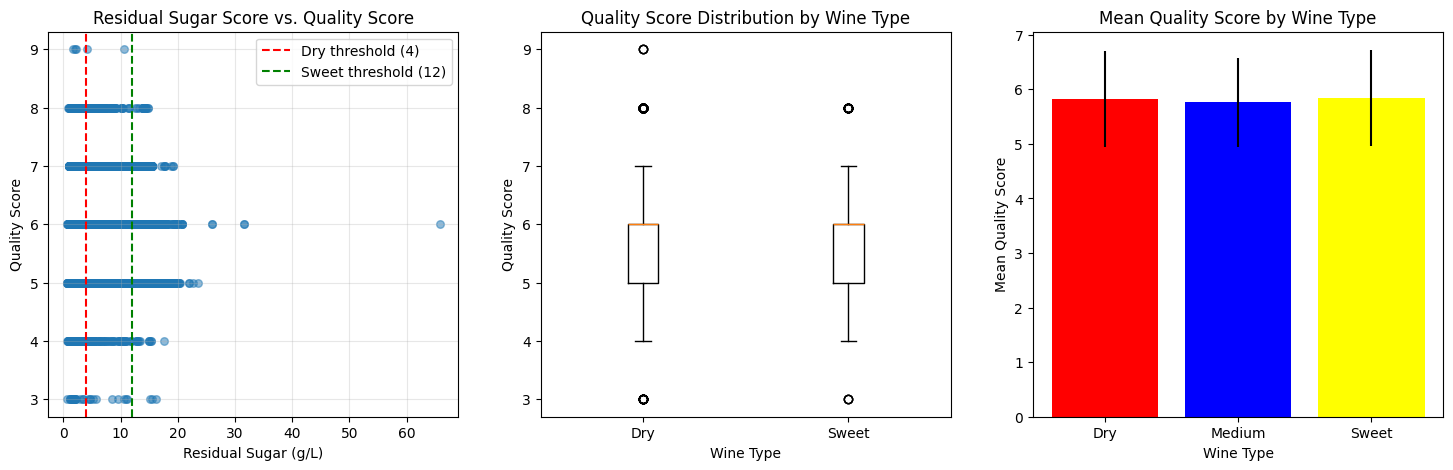

In [22]:
dry_wine = df_full[df_full['residual sugar'] < 4]
sweet_wine = df_full[df_full['residual sugar'] > 12]
medium_wine = df_full[(df_full['residual sugar'] >= 4) & (df_full['residual sugar'] <= 12)]

fix, axes = plt.subplots(1, 3, figsize=(18,5))

axes[0].scatter(df_full['residual sugar'], df_full['quality'], alpha=0.5, s=30)
axes[0].axvline(x=4, color='red', linestyle='--', label='Dry threshold (4)')
axes[0].axvline(x=12, color='green', linestyle='--', label='Sweet threshold (12)')
axes[0].set_xlabel('Residual Sugar (g/L)')
axes[0].set_ylabel('Quality Score')
axes[0].set_title('Residual Sugar Score vs. Quality Score')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].boxplot([dry_wine['quality'], sweet_wine['quality']], tick_labels=['Dry', 'Sweet'])
axes[1].set_xlabel('Wine Type')
axes[1].set_ylabel('Quality Score')
axes[1].set_title('Quality Score Distribution by Wine Type')

means = [dry_wine['quality'].mean(), sweet_wine['quality'].mean(), medium_wine['quality'].mean()]
stds = [dry_wine['quality'].std(), sweet_wine['quality'].std(), medium_wine['quality'].std()]
axes[2].bar(['Dry', 'Medium', 'Sweet'], means, yerr=stds, color=['red', 'blue', 'yellow'])
axes[2].set_xlabel('Wine Type')
axes[2].set_ylabel('Mean Quality Score')
axes[2].set_title('Mean Quality Score by Wine Type')
plt.show()


In [23]:
print(f"Sweet Wine Mean Quality: {sweet_wine['quality'].mean()}")
print(f"Dry Wine Mean Quality: {dry_wine['quality'].mean()}")

print("\n" + "="*40 + "\n")

print(f"Sweet Wine Std Dev Quality: {sweet_wine['quality'].std()}")
print(f"Dry Wine Std Dev Quality: {dry_wine['quality'].std()}")

Sweet Wine Mean Quality: 5.7601918465227815
Dry Wine Mean Quality: 5.818592822831309


Sweet Wine Std Dev Quality: 0.8111160255155861
Dry Wine Std Dev Quality: 0.883799385896098


Based on the above plots and statistical metrics, we can say that **Dry** wine has slightly higher average quality over sweet wine

## Question 2.4

In [24]:
df_regression = df_full.copy()
df_regression['type'] = df_regression['type'].map({'white': 0, 'red': 1})
x_regression = df_regression.drop(['quality'], axis=1).values
y_regression = df_regression['quality'].values

x_train_regression, x_test_regression, y_train_regression, y_test_regression = train_test_split(x_regression, y_regression, test_size = 0.1, random_state = 0)

## Question 2.5

In [25]:
dt_regression = DecisionTreeRegressor(random_state=0)
dt_regression.fit(x_train_regression, y_train_regression)

y_test_pred_regression = dt_regression.predict(x_test_regression)
mae = mean_absolute_error(y_test_regression, y_test_pred_regression)

print(f"MAE on test set: {mae:.4f}")

MAE on test set: 0.4477


## Question 2.6

In [26]:
mae_scores = []

for seed in range(10):
  x_tr, x_te, y_tr, y_te = train_test_split(x_regression, y_regression, test_size = 0.1, random_state = seed)
  dt = DecisionTreeRegressor(random_state=seed)
  dt.fit(x_tr, y_tr)
  y_te_pred = dt.predict(x_te)
  mae_scores.append(mean_absolute_error(y_te, y_te_pred))

mae_mean = np.mean(mae_scores)
mae_std = np.std(mae_scores)

print(f"MAE Mean: {mae_mean:.4f}")
print(f"MAE Std Dev: {mae_std:.4f}")
print(f"Confidence Interval: [{mae_mean - 2*mae_std:.4f}, {mae_mean + 2*mae_std:.4f}]")

MAE Mean: 0.4622
MAE Std Dev: 0.0252
Confidence Interval: [0.4117, 0.5126]


- The mean MAE shows the expected error across data splits, giving a more robust estimate than a single run.
- The STD Deviation shows variability in performance. Lower std means the model is more stable and consistent.

We can construct a confidence interval for the expected error: 95% CI: **[0.4117, 0.5126]**

This tells us the expected error range, helping us assess model reliability.

## Question 2.7

In [27]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x_regression, y_regression, test_size = 0.1, random_state=0)
x_train_hp, x_val, y_train_hp, y_val = train_test_split(x_train_full, y_train_full, test_size = 0.2, random_state=0)

print("Dataset splits: ")
print(f"\nTotal: {len(x_regression)}")
print(f"Training: {len(x_train_hp)} - {((len(x_train_hp) / len(x_regression)) * 100):.1f}%")
print(f"Test: {len(x_test)} - {((len(x_test) / len(x_regression)) * 100):.1f}%")
print(f"Validation: {len(x_val)} - {((len(x_val) / len(x_regression)) * 100):.1f}%")

Dataset splits: 

Total: 6497
Training: 4677 - 72.0%
Test: 650 - 10.0%
Validation: 1170 - 18.0%


In [28]:
parameter_combinations = [
    {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 10},
    {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 10},
    {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 5},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
]

results = []

for i, params in enumerate(parameter_combinations, 1):
  dt = DecisionTreeRegressor(random_state=0, **params)
  dt.fit(x_train_hp, y_train_hp)

  train_mae = mean_absolute_error(y_train_hp, dt.predict(x_train_hp))
  val_mae = mean_absolute_error(y_val, dt.predict(x_val))

  results.append({
      'Parameters': params,
      "train_mae": train_mae,
      "val_mae": val_mae
  })

best_result = min(results, key=lambda x: x['val_mae'])
print(f"Best Parameters: {best_result['Parameters']}")
print(f"Best Train MAE: {best_result['train_mae']:.4f}")
print(f"Best Validation MAE: {best_result['val_mae']:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best Train MAE: 0.0009
Best Validation MAE: 0.5094


## Question 2.8

The validation set is more reliable for hyperparameter selection. This is because the training set is used to train the model, which means that the model has already 'seen' the data and optimized for it. The validation set provides unbiased estimate of how the model generalizes the unseen data, which is the true goal

## Question 2.9

In [29]:
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose = 1)
grid_search.fit(x_train_regression, y_train_regression)

Fitting 10 folds for each of 63 candidates, totalling 630 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='neg_mean_absolute_error', verbose=1)

## Question 2.10

In [30]:
best_model_cv = grid_search.best_estimator_
y_test_pred_cv = best_model_cv.predict(x_test_regression)
test_mae_cv = mean_absolute_error(y_test_regression, y_test_pred_cv)

print(f"Best Model from Cross-Validation Test MAE: {test_mae_cv:.4f}")

Best Model from Cross-Validation Test MAE: 0.4419


Method 9 is the more reliable approach. It uses all training data efficiently, with each sample used for both training and validation in different folds. It provides a more robust estimate of model performance by averaging across multiple train-validation splits, reducing variance, it avoids single split dependency as in Method 7, where performance can vary based on how data is split and unlike Method 6 which only tests stability without optimization, it combines hyperparameter tuning with reliable performance estimation.

## Question 2.11

In [31]:
param_grid_fixed = {
    'max_depth': [5],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search_fixed = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid_fixed, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, verbose = 1)
grid_search_fixed.fit(x_train_regression, y_train_regression)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='neg_mean_absolute_error', verbose=1)

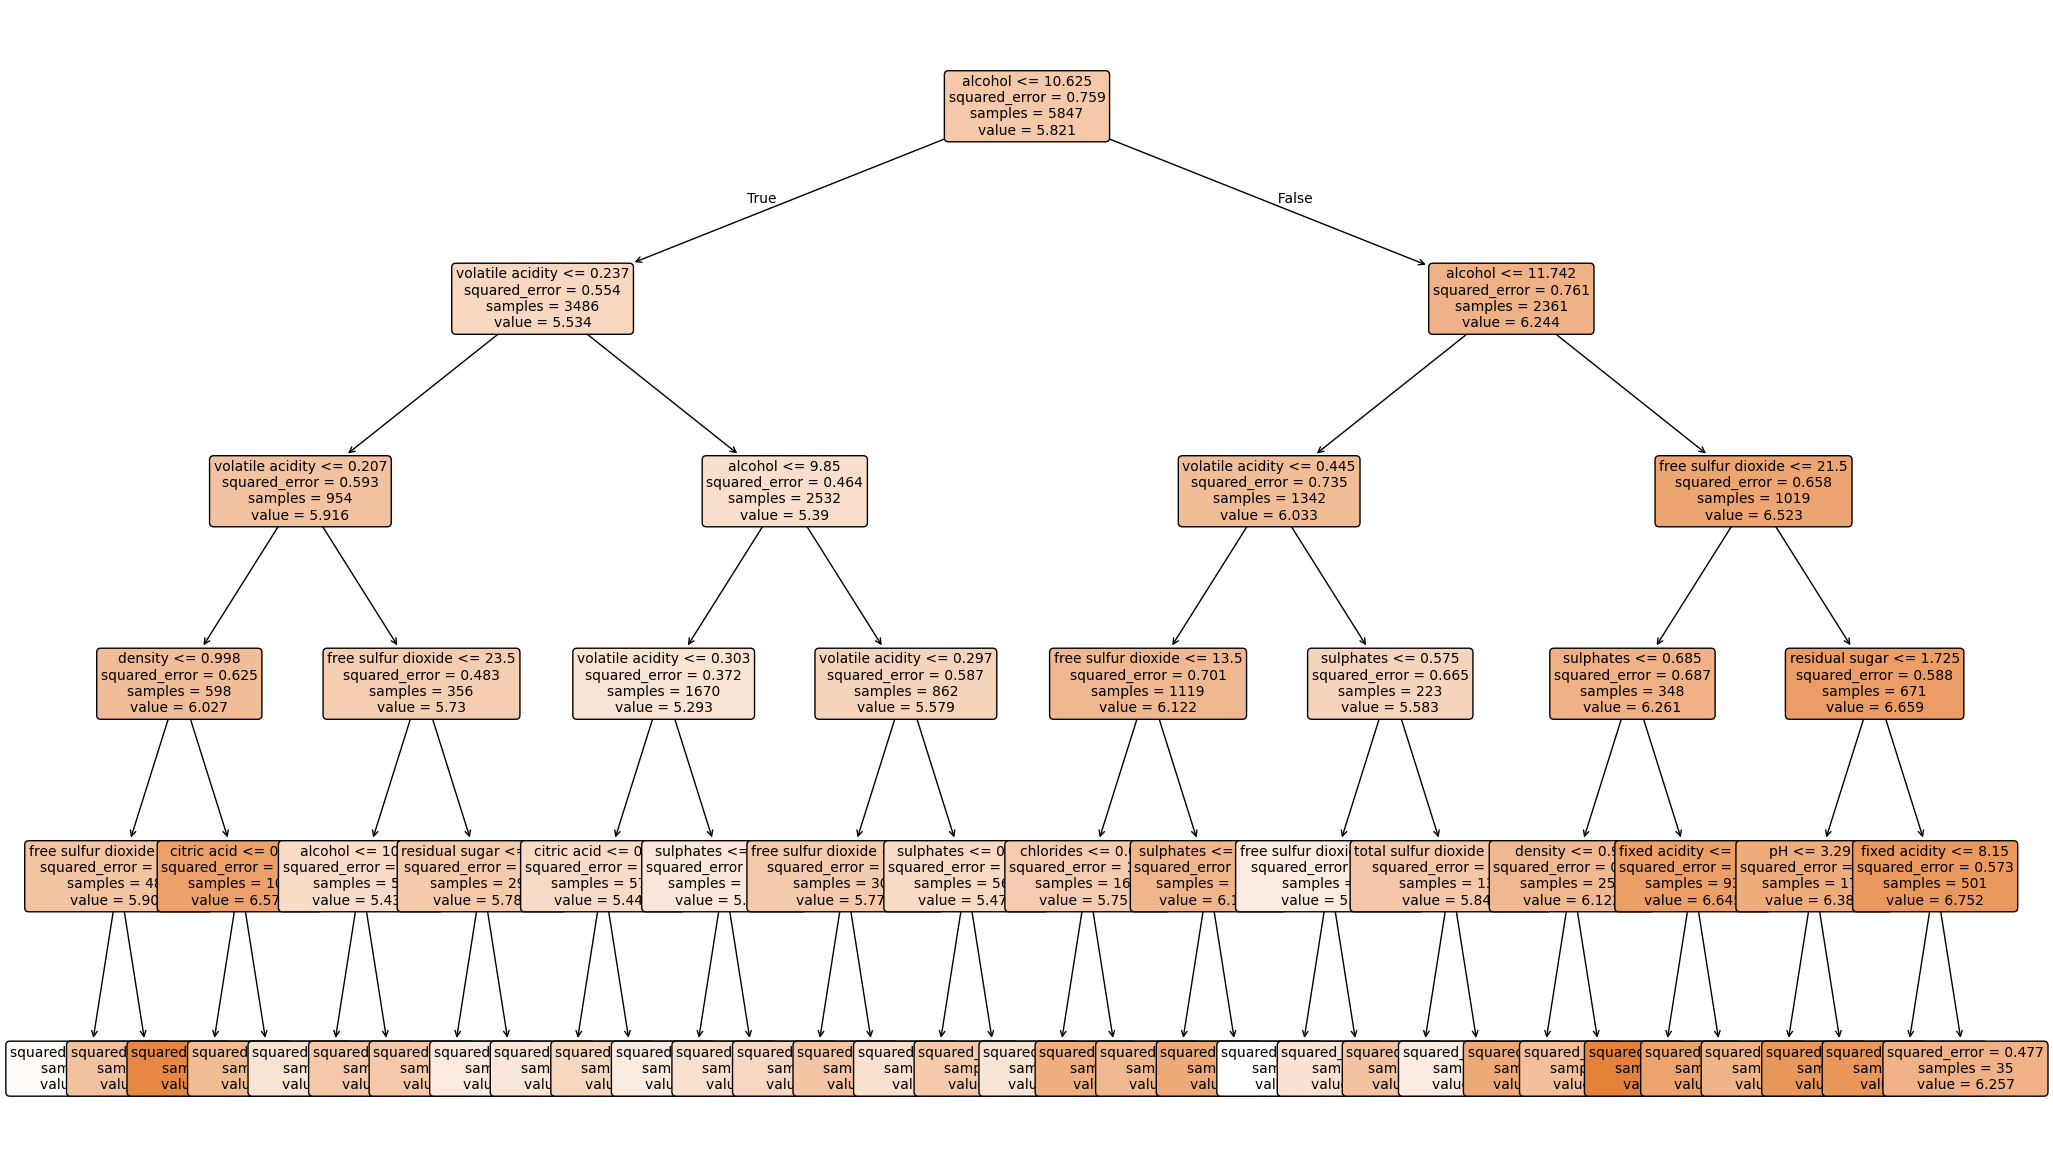

In [32]:
best_tree = grid_search_fixed.best_estimator_

features = df_full.drop('quality', axis=1).columns.tolist()

plt.figure(figsize=(25, 15))
plot_tree(best_tree, feature_names=features, filled=True, rounded=True, fontsize=10)
plt.show()


In [33]:
def get_rules(tree, feature_names):
  tree_ = tree.tree_

  feature_name = [
      feature_names[i] if i != -2 else "undefined!"
      for i in tree_.feature
  ]

  rules = []
  def recurse(node, depth, rule):
    if tree_.feature[node] != -2:
      name = feature_name[node]
      threshold = tree_.threshold[node]
      left_rule = rule + f"{name} <= {threshold:.3f}"
      right_rule = rule + f"{name} > {threshold:.3f}"
      recurse(tree_.children_left[node], depth + 1, left_rule + " AND ")
      recurse(tree_.children_right[node], depth + 1, right_rule + " AND ")
    else:
      value = tree_.value[node][0][0]
      rules.append((rule[:-5], value))

  recurse(0, 1, "")
  return rules

In [34]:
rules = get_rules(best_tree, features)

for i, (rule, value) in enumerate(rules, 1):
  print(f"Rule: {i}: ")
  print(f"IF {rule}")
  print(f"THEN predicted quality: {value}\n")



Rule: 1: 
IF alcohol <= 10.625 AND volatile acidity <= 0.237 AND volatile acidity <= 0.207 AND density <= 0.998 AND free sulfur dioxide <= 7.500
THEN predicted quality: 4.833333333333333

Rule: 2: 
IF alcohol <= 10.625 AND volatile acidity <= 0.237 AND volatile acidity <= 0.207 AND density <= 0.998 AND free sulfur dioxide > 7.500
THEN predicted quality: 5.930817610062893

Rule: 3: 
IF alcohol <= 10.625 AND volatile acidity <= 0.237 AND volatile acidity <= 0.207 AND density > 0.998 AND citric acid <= 0.305
THEN predicted quality: 7.072727272727272

Rule: 4: 
IF alcohol <= 10.625 AND volatile acidity <= 0.237 AND volatile acidity <= 0.207 AND density > 0.998 AND citric acid > 0.305
THEN predicted quality: 6.074074074074074

Rule: 5: 
IF alcohol <= 10.625 AND volatile acidity <= 0.237 AND volatile acidity > 0.207 AND free sulfur dioxide <= 23.500 AND alcohol <= 10.250
THEN predicted quality: 5.2926829268292686

Rule: 6: 
IF alcohol <= 10.625 AND volatile acidity <= 0.237 AND volatile acid

In [35]:
importances = best_tree.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)
feature_importances

,Feature,Importance
11,alcohol,0.569485
2,volatile acidity,0.191668
6,free sulfur dioxide,0.061207
10,sulphates,0.058388
8,density,0.031699
5,chlorides,0.027610
3,citric acid,0.024806
4,residual sugar,0.014054
1,fixed acidity,0.009337
9,pH,0.006400


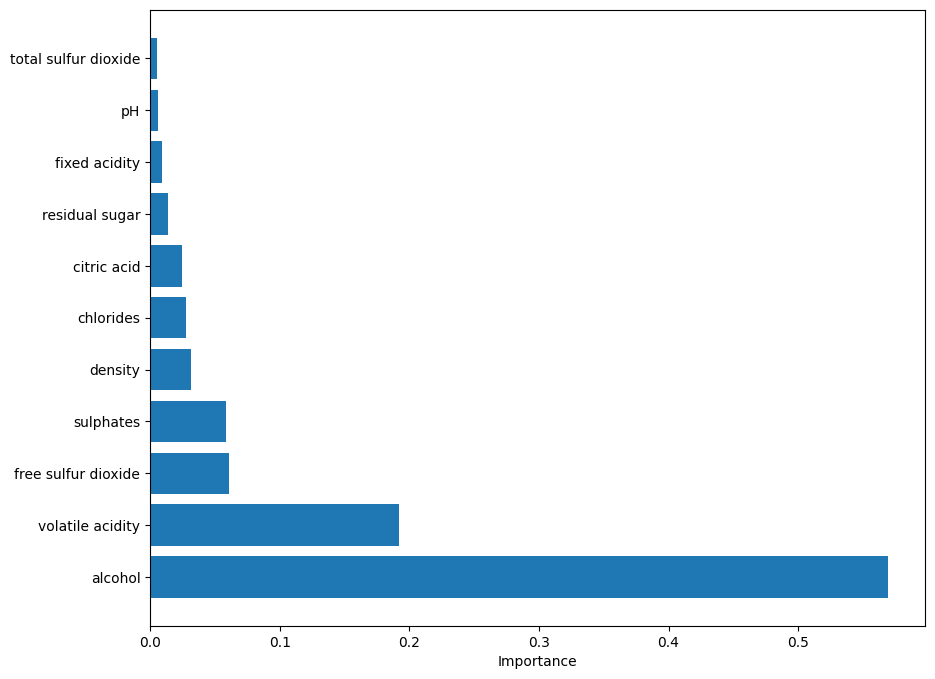

In [36]:
plt.figure(figsize=(10, 8))
feature_importances = feature_importances[feature_importances['Importance'] > 0]

plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.show()